In [6]:
"""
퍼셉트론 perceptron
"""
import numpy as np
# 가중치 - ANN -> 학습의 대상
# 가중치를 이용한 XOR 해결
w11 = np.array([-2, -2]) # weight
w12 = np.array([2, 2])
w2 = np.array([1, 1])

b1 = 3 # bias : 0으로 가는것을 방지 y = ax + b: 절편역할 # 가중치 연산 결과값에 +
b2 = -1
b3 = -1
def MLP(x, w, b): # multi layer perceptron
    y = np.sum(w * x) + b
    # 연산의 결과는 연속적 수치 -> y/n -> 0~1 값을 매핑 af (sigmoid) : 0.5 > y = 1, else = 0
    if y <= 0: # activation function 의 역할 : 소수점 연산, 신경망 : 정규화
        return 0
    else:
        return 1
def NAND(x1, x2):
    return MLP(np.array([x1, x2]), w11, b1)
def OR(x1, x2):
    return MLP(np.array([x1, x2]), w12, b2)
def AND(x1, x2):
    return MLP(np.array([x1, x2]), w2, b3)
def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1, x2))
print("XOR 문제")
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(x[0], x[1])
    print("입력 값 : " + str(x) + " 출력 값 : " + str(y))
print("OR 문제")
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = OR(x[0], x[1])
    print("입력 값 : " + str(x) + " 출력 값 : " + str(y))   
print("AND 문제")
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = AND(x[0], x[1])
    print("입력 값 : " + str(x) + " 출력 값 : " + str(y))  
print("NAND 문제")
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = NAND(x[0], x[1])
    print("입력 값 : " + str(x) + " 출력 값 : " + str(y)) 


XOR 문제
입력 값 : (0, 0) 출력 값 : 0
입력 값 : (1, 0) 출력 값 : 1
입력 값 : (0, 1) 출력 값 : 1
입력 값 : (1, 1) 출력 값 : 0
OR 문제
입력 값 : (0, 0) 출력 값 : 0
입력 값 : (1, 0) 출력 값 : 1
입력 값 : (0, 1) 출력 값 : 1
입력 값 : (1, 1) 출력 값 : 1
AND 문제
입력 값 : (0, 0) 출력 값 : 0
입력 값 : (1, 0) 출력 값 : 0
입력 값 : (0, 1) 출력 값 : 0
입력 값 : (1, 1) 출력 값 : 1
NAND 문제
입력 값 : (0, 0) 출력 값 : 1
입력 값 : (1, 0) 출력 값 : 1
입력 값 : (0, 1) 출력 값 : 1
입력 값 : (1, 1) 출력 값 : 0


(100, 2)
(75, 2)


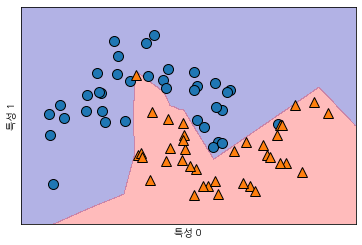

In [187]:
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn # 학습에 도움을 주는 패키지

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)# (100, 2)

print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# 결과 예측불가 # hyper parameter : optimaze 해야 알수 있다
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlp#sklearn.neural_network.MLPClassifier
# batch_size를 사용하는 이유는 기울기 0으로 갈 확률이 적어짐
# constant : 불변, invscaling' : 역스케일링, 'adaptive' : 적응

# mlp = MLPClassifier(max_iter=3000, activation='relu', solver='adam', alpha=0.01, random_state=0).fit(X_train, y_train) # 현재 과적합
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3) # 선
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

print(X_train.shape)

In [181]:
# 입력 생성레이어 출력
mlp.n_layers_

3

In [188]:
# [20]사이즈 단독 : 100x2 -> 2x20 : 2는 앞의 행에 맞추어 결정 # 바이어스가 20
# [10, 10] 두개의 레이어 : 100x2 -> 2x10 -> 10x10 # 바이어스 10 : 3번째 행렬 10은 앞의 행에 맞추어 결정
mlp.coefs_ # coef ficient

[array([[-0.15855127,  1.65408267, -0.74007897, -3.95416422, -0.1076738 ,
          7.37539571, -0.08802416,  9.81913382,  7.99356564,  0.25296731],
        [-1.40130717,  1.17896331,  4.7764105 , -1.35478871, -0.60499122,
         -3.93952976, -0.67666214,  0.47959084,  0.40007515, -0.46719005]]),
 array([[-2.57212608e-01,  2.54649014e-01, -1.14412726e+00,
          1.00730872e+00, -5.41076910e-01, -5.93907060e-01,
          3.78895783e-01,  7.68311646e-02, -2.08326606e+00,
          4.07711948e+00],
        [-1.53481421e-01, -6.77908766e-02, -4.28876578e-01,
         -1.27504242e-01,  1.82185280e-01,  4.66638824e-01,
         -1.69792897e+00, -4.13108923e-01, -6.64731654e-01,
          3.06872837e+00],
        [ 7.66868751e-02, -6.58955426e-02,  1.70524181e+00,
         -7.43717100e-01, -3.18039302e-01, -5.11723931e-01,
          1.60457073e+00, -2.69518041e-01,  1.28711884e-01,
         -7.33164618e-01],
        [-3.72560686e-01, -4.43794280e-01,  1.33587069e+00,
         -9.6216049

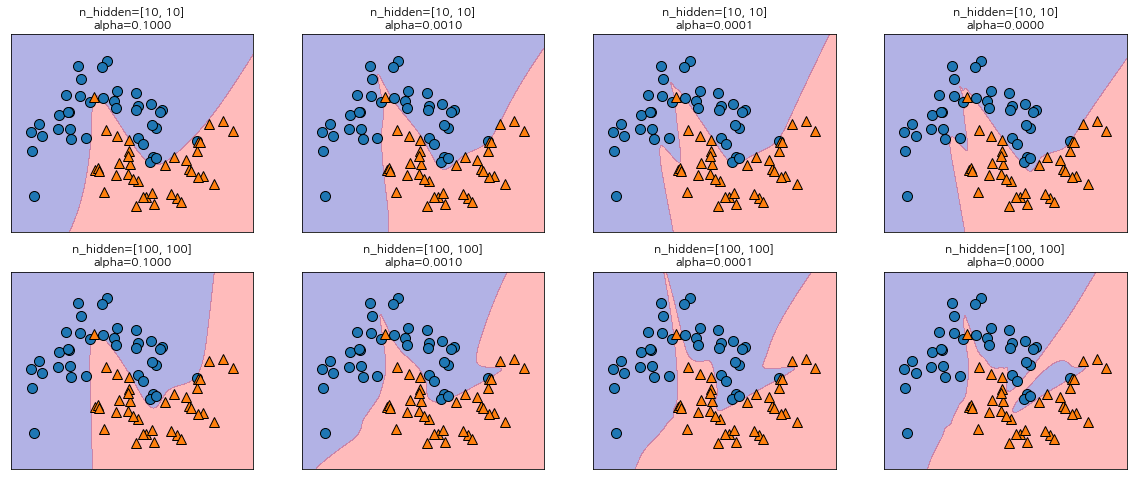

In [28]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
"""
 100x2 2x10 100x10
 100x2 2x100(2개의 변수에서 100개의 변수로 확장) 100x100 (시각화 결론 : 특성이 많으면 과적합된다)
 alpha 신경망에서의 규제(reqularization) : 과적합 방지
 규제가 크면 - 일반화, 작으면 - 과적합
"""
for axx, n_hidden_nodes in zip(axes, [10, 100]): # 레이어의 아웃풋 차수
    for ax, alpha in zip(axx, [0.1, 0.001, 0.0001, 0.00001]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, activation='tanh', 
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                           alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

In [29]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("유방암 데이터의 특성별 최대값:\n{}".format(cancer.data.max(axis=0)))

유방암 데이터의 특성별 최대값:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [32]:
import pandas as pd
pd.DataFrame(cancer.data).shape

(569, 30)

In [35]:
# 569x30
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.2f}".format(mlp.score(X_train, y_train))) # 94이 나왔다
print("테스트 세트 정확도 : {:.2f}".format(mlp.score(X_test, y_test))) # 만약 80이 나온다면 과적합


훈련 세트 정확도 : 0.94
테스트 세트 정확도 : 0.92


In [42]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(max_iter=1000, alpha=1, solver='sgd', activation='tanh', random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도 : {:.3f}".format(mlp.score(X_train_scaled, y_train))) 
print("테스트 세트 정확도 : {:.3f}".format(mlp.score(X_test_scaled, y_test))) 



훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.979


In [55]:
mlp.get_params()

{'activation': 'tanh',
 'alpha': 1,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [47]:
# (569, 30) 30x100
mlp.n_layers_

3

In [48]:
mlp.coefs_

[array([[ 0.03474121,  0.04524796,  0.05159253, ..., -0.16689027,
          0.1039475 , -0.16231781],
        [ 0.07528031, -0.09517393,  0.09854737, ..., -0.10040769,
         -0.13171199, -0.03119848],
        [-0.03943264,  0.03968993, -0.01858482, ...,  0.09620901,
          0.14876056,  0.13604547],
        ...,
        [-0.08294828,  0.02362873,  0.10288543, ...,  0.0483176 ,
          0.11382008, -0.02611098],
        [ 0.00071433, -0.09224719, -0.12825274, ..., -0.06589555,
          0.13810732, -0.06366936],
        [-0.13660954, -0.0381702 ,  0.10304202, ..., -0.06355632,
          0.09751167,  0.05702818]]), array([[-0.07362611],
        [ 0.12891075],
        [-0.15335958],
        [ 0.27762568],
        [ 0.11024681],
        [-0.04298303],
        [ 0.07199022],
        [ 0.09741096],
        [ 0.31041886],
        [-0.23212829],
        [-0.10886169],
        [ 0.12036328],
        [-0.18110505],
        [ 0.40121763],
        [ 0.01414669],
        [ 0.04659554],
      

In [49]:
co = pd.DataFrame(mlp.coefs_)
print('전체', co.shape)
print(co[0].shape)
print(co[0][0].shape)

전체 (2, 1)
(2,)
(30, 100)


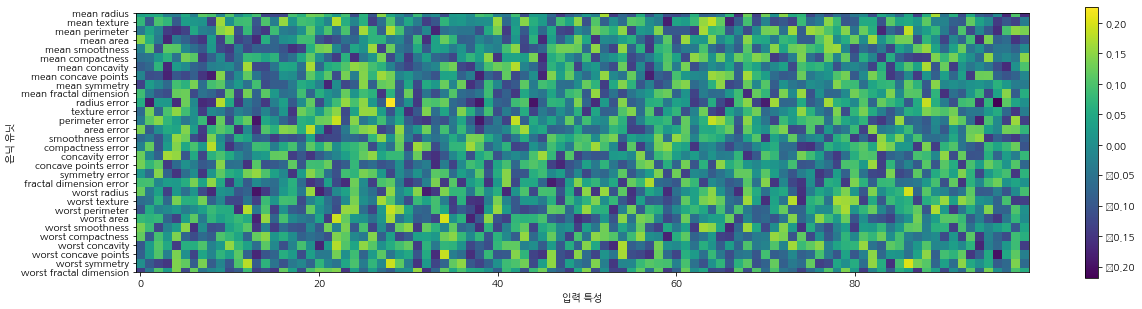

In [53]:
# (569, 30) 가중치:30x100 # 계산시 내적
# 다차원방정식과 같다 : 가중치는 다차원방정식의 계수들이다
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
# interpolation : 보간법 : 컬러를 결정할수 없는 경우에 주변값을 보고 결정하라
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.ylabel("은닉 유닛")
plt.xlabel("입력 특성")
plt.colorbar()

In [56]:
# email
# 문제 : 신경망으로 분류 하라
import pandas as pd
wine = pd.read_csv('./wine.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash",
                                             "Alcalinity_of_Ash", "Magnesium", "Total_phenols",
                                             "Falvanoids", "Nonflavanoid_phenols",
                                             "Proanthocyanins", "Color_intensity", "Hue",
                                             "OD280", "Proline"], encoding="utf-8")
print (wine.head()) 


   Cultivator  Alchol  Malic_Acid   Ash  Alcalinity_of_Ash  Magnesium  \
0           1   14.23        1.71  2.43               15.6        127   
1           1   13.20        1.78  2.14               11.2        100   
2           1   13.16        2.36  2.67               18.6        101   
3           1   14.37        1.95  2.50               16.8        113   
4           1   13.24        2.59  2.87               21.0        118   

   Total_phenols  Falvanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280  Proline  
0             5.64  1.04   3.92     1065  
1             4.38  1.05   3.40     1050  
2    

In [101]:
# 해결시도, 이상한듯..
X = wine.drop(['Cultivator'], axis=1)
y = wine["Cultivator"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X.shape

mlp = MLPClassifier(max_iter=1000, alpha=1, solver='adam', activation='tanh', random_state=0)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.2f}".format(mlp.score(X_test, y_test)))
print(X_train.shape)

mlp.get_params()
mlp.n_layers_

훈련 세트 정확도 : 0.99
테스트 세트 정확도 : 0.98
(133, 13)


3

In [ ]:
"""
오후 시작 ===========================================================================================================================================================================================================
"""

In [97]:
wine['Cultivator'].unique()
print(wine.shape)

array([1, 2, 3], dtype=int64)

In [102]:
# 정답
from sklearn.model_selection import train_test_split
X = wine.drop(['Cultivator'], axis=1)
y = wine["Cultivator"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,30,30), max_iter=1000)
mlp.fit(X_train, y_train)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


[[15  0  0]
 [ 0 18  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.95      1.00      0.97        18
           3       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [104]:
from sklearn.model_selection import GridSearchCV
train_size = 100
model = MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=1000)
model_cv = GridSearchCV( model, cv=5, 
                       param_grid={
                           'hidden_layer_sizes':[(30,30,30), (30,20,10)],
                           'alpha':[0.0001, 0.001, 0.1, 1]
                       })
model_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08,
                                     hidden_layer_sizes=(30, 30, 30),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=1000,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_gri

In [105]:
print('모델 계수', model_cv.best_estimator_)

모델 계수 MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 20, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


In [116]:
# 신경망의 비지도학습
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
"""
convolution 연산
    신경망은 fully-connected 데이터를 일차원화
    이미지 -> 2차원 -> 일렬 -> 필터(주변부 계산)로 이미지 특징 추출
    -> 분석 -> 재조합
"""
from sklearn import linear_model, datasets, metrics
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

# email
# CNN 머신러닝
def nudge_dataset(X, Y):
    direction_vectors = [
        [[0, 1, 0], [0, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [1, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 1], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 0], [0, 1, 0]]] # 필터
    print(direction_vectors)
    shift = lambda x, w: convolve(x.reshape((8, 8)), mode='constant', weights=w).ravel()
    # 이미지를 특징값을 고려해서 변형값으로 변경
    X = np.concatenate([X] + [np.apply_along_axis(shift, 1, X, vector) for vector in direction_vectors])
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y 

In [117]:
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
X = np.asarray(digits.data, 'float32')

print(X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [118]:
X, Y = nudge_dataset(X, digits.target)
X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001) # minmax 정규화
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

[[[0, 1, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [1, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 1], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 1, 0]]]


In [120]:
logistic = linear_model.LogisticRegression()
"""
 deep learning 학습 ( gpu ), 제한된 볼트만 머신 ( 회로가 너무 많은 )
 비지도 학습 -> AE(시각화), VAE(학습중에 random한 수를 가중치에 결합) : 분포를 학습, 
     - GAN ( 화가의 화풍을 학습하고 학습이 끝나면 랜덤한 noise를 주면 그림을 그림 )
 PCA와 같다
"""
rbm = BernoulliRBM(random_state=0, verbose=True) # 신경망 비지도학습
# rbm = PCA와 같은 역할(딥러닝) -> 특성추출
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])
rbm.learning_rate = 0.06
rbm.n_iter = 20
rbm.n_components = 100 # 28x28 => 784
logistic.C = 6000.0 # 로지스틱에서의 규제값 # MLPClassifier - alpha
classifier.fit(X_train, Y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -25.39, time = 0.10s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -23.77, time = 0.15s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -22.94, time = 0.14s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -21.91, time = 0.14s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -21.69, time = 0.14s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -21.06, time = 0.14s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -20.89, time = 0.14s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -20.64, time = 0.15s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -20.36, time = 0.15s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -20.09, time = 0.15s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -20.08, time = 0.14s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -19.82, time = 0.15s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -19.64, time = 0.15s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -19.61, time = 0.15s
[BernoulliRBM] Iteration 15, 

C:\Users\2-18\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\2-18\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('rbm',
                 BernoulliRBM(batch_size=10, learning_rate=0.06,
                              n_components=100, n_iter=20, random_state=0,
                              verbose=True)),
                ('logistic',
                 LogisticRegression(C=6000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
"""
SVM : support vector machine : pre 딥러닝 시기에 많이 쓰임
- SVC, SVR
- 규제( C )와 모양( gamma : 초평면의 모양을 조절 ) : 과적합을 방지하는 역할
- 모델 중에서 고차원을 좋아하는 유일한 모델
- XOR 문제 : 고차원 공간으로 이동해서 해결 (신경망 : 레이어)
- convex hull : 집단의 외곽선을 구하는것 : 가장 인기있는 모델
- 스케일에 민감
- 비선형 kernel 지원(+선형)    
    kernel{‘linear’, 
    ‘poly’(다항식 커널 polynomial), 
    ‘rbf’(방사형 커널:디폴트, exp), 
    ‘sigmoid’(비선형 0~1사이값 매핑), 
    ‘precomputed’(미리 계산)}, 
    default=’rbf’ : 표준정규분포식의 exp값을 사용
        - exp( (x - mu) ( x- mu )T / 2 sigma ^2 )
        정규분포를 이용한 고차원 공간으로서 변형함
"""

In [121]:
from sklearn.svm import SVR
import numpy as np

n_samples, n_features = 10, 5
np.random.seed(0)
y = np.random.randn(n_samples)
X = np.random.randn(n_samples, n_features)
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X, y)


C:\Users\2-18\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


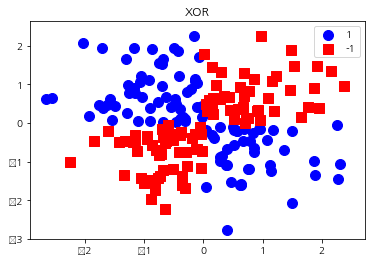

In [122]:
# email - svm
import numpy as np
import matplotlib.pylab as plt
np.random.seed(0)
X_xor = np.random.randn(200, 2) # 숫자 200
# XOR은 달라야 참
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0) # 4그룹
y_xor = np.where(y_xor, 1, -1)
plt.scatter( X_xor[y_xor==1, 0],  X_xor[y_xor== 1, 1], c='b', marker='o',  label='1', s=100)
plt.scatter( X_xor[y_xor==-1, 0],  X_xor[y_xor==-1, 1], c='r', marker='s',  label='-1', s=100)
plt.ylim(-3.0)
plt.legend()
plt.title("XOR")
plt.show()

def plot_xor(X, y, model, title, xmin=-3, xmax=3, ymin=-3, ymax=3):
    # 범위값 1000
    # 1000 => 1000000개의 정점 조합
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    # 값을 확인하고 # 원본 모양으로 변환
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T),
                    XX.shape)
    plt.contourf(XX, YY, ZZ,  alpha=0.5) # 등고선맵, f(fill 컬러로 채우기)
    plt.scatter(X[y== 1, 0], X[y== 1, 1], c='b', marker='o', label='+1',
                s=100)
    plt.scatter(X[y==-1, 0], X[y==-1, 1], c='r', marker='s', label='-1',
                s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.show() 

C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


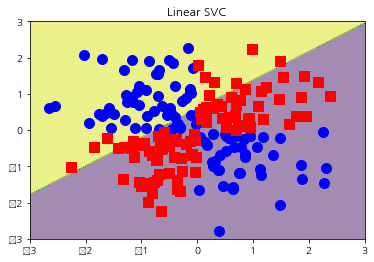

In [123]:
from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, svc, 'Linear SVC')

In [164]:
# 다항방정식을 이용
from sklearn.preprocessing import FunctionTransformer# 함수를 이용해서 다차원 공간화
def basis(X):
    return np.vstack([X[:,0]**2, np.sqrt(2)*X[:,0]*X[:,1], X[:,1]**2]).T
X = np.arange(8).reshape(4, 2)
X
FunctionTransformer(basis).fit_transform(X)

                      
                      

C:\Users\2-18\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Users\2-18\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


array([[ 0.        ,  0.        ,  1.        ],
       [ 4.        ,  8.48528137,  9.        ],
       [16.        , 28.28427125, 25.        ],
       [36.        , 59.39696962, 49.        ]])

C:\Users\2-18\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Users\2-18\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


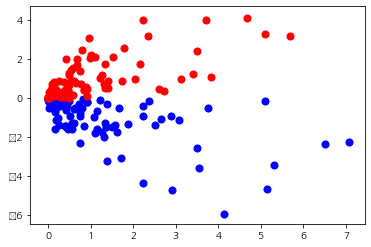

In [166]:
X_xor2 = FunctionTransformer(basis).fit_transform(X_xor)
plt.scatter(X_xor2[y_xor==1, 0], X_xor2[y_xor==1,1], c='b', s=50)
plt.scatter(X_xor2[y_xor==-1, 0], X_xor2[y_xor==-1,1], c='r', s=50)
plt.show()

In [190]:
svc = SVC(kernel='linear').fit(X_xor2, y_xor)
# plot_xor(X_xor2, y_xor, svc, 'Linear SVC')
# 강사님 실행 실패

(200, 2)


C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


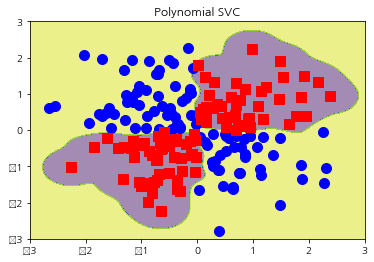

In [153]:
polysvc = SVC(kernel="rbf", degree=2, gamma=10, coef0=2).fit(X_xor, y_xor) 
print(X_xor.shape)
plot_xor(X_xor, y_xor, polysvc, 'Polynomial SVC')

In [170]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
iris = load_iris()

# svm을 이용한 분류모델을 작성해보시오

# 그리고 내일 시험준비

In [178]:
# 작성해보기
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.svm import SVC
irissvc = SVC(kernel="rbf", max_iter=1000, degree=2, gamma=10, coef0=2).fit(X_train, y_train) 

print("훈련 세트 정확도 : {:.3f}".format(irissvc.score(X_train, y_train))) 
print("테스트 세트 정확도 : {:.3f}".format(irissvc.score(X_test, y_test)))
irissvc
# plot_xor(X_test, y_test, irissvc, 'Polynomial SVC')

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.947


SVC(C=1.0, cache_size=200, class_weight=None, coef0=2,
    decision_function_shape='ovr', degree=2, gamma=10, kernel='rbf',
    max_iter=1000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)